<h2><b>Credit Card Fraud Detection</b></h2>
<h5>Objective:</h5>
The primary objective of the Credit Card Fraud Detection project is to build a robust and accurate machine learning model capable of identifying fraudulent credit card transactions. By detecting and preventing fraudulent transactions, the project aims to enhance the security of credit card usage and minimize financial losses for both consumers and financial institutions.
<h5>Project Description:</h5>
Credit card fraud is a significant concern for financial institutions and consumers alike. With the increasing volume of online transactions, detecting fraudulent activities in real-time has become crucial. This project aims to build a robust fraud detection system using machine learning algorithms to identify and flag suspicious transactions.

<h2>Importing Libraries</h2>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'imblearn'

In [2]:
# Loading dataset
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

0    284315
1       492
Name: Class, dtype: int64


0 is real<br>
1 is fraud<br>

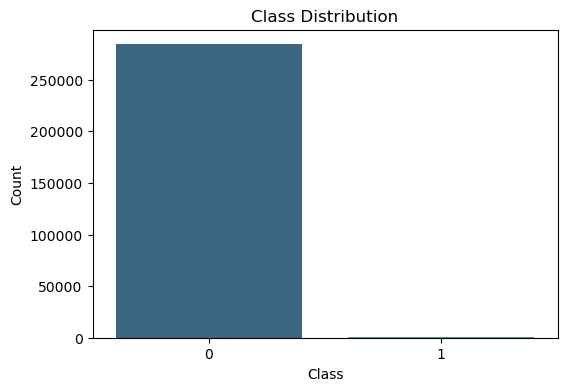

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

This dataset is imbalacned 

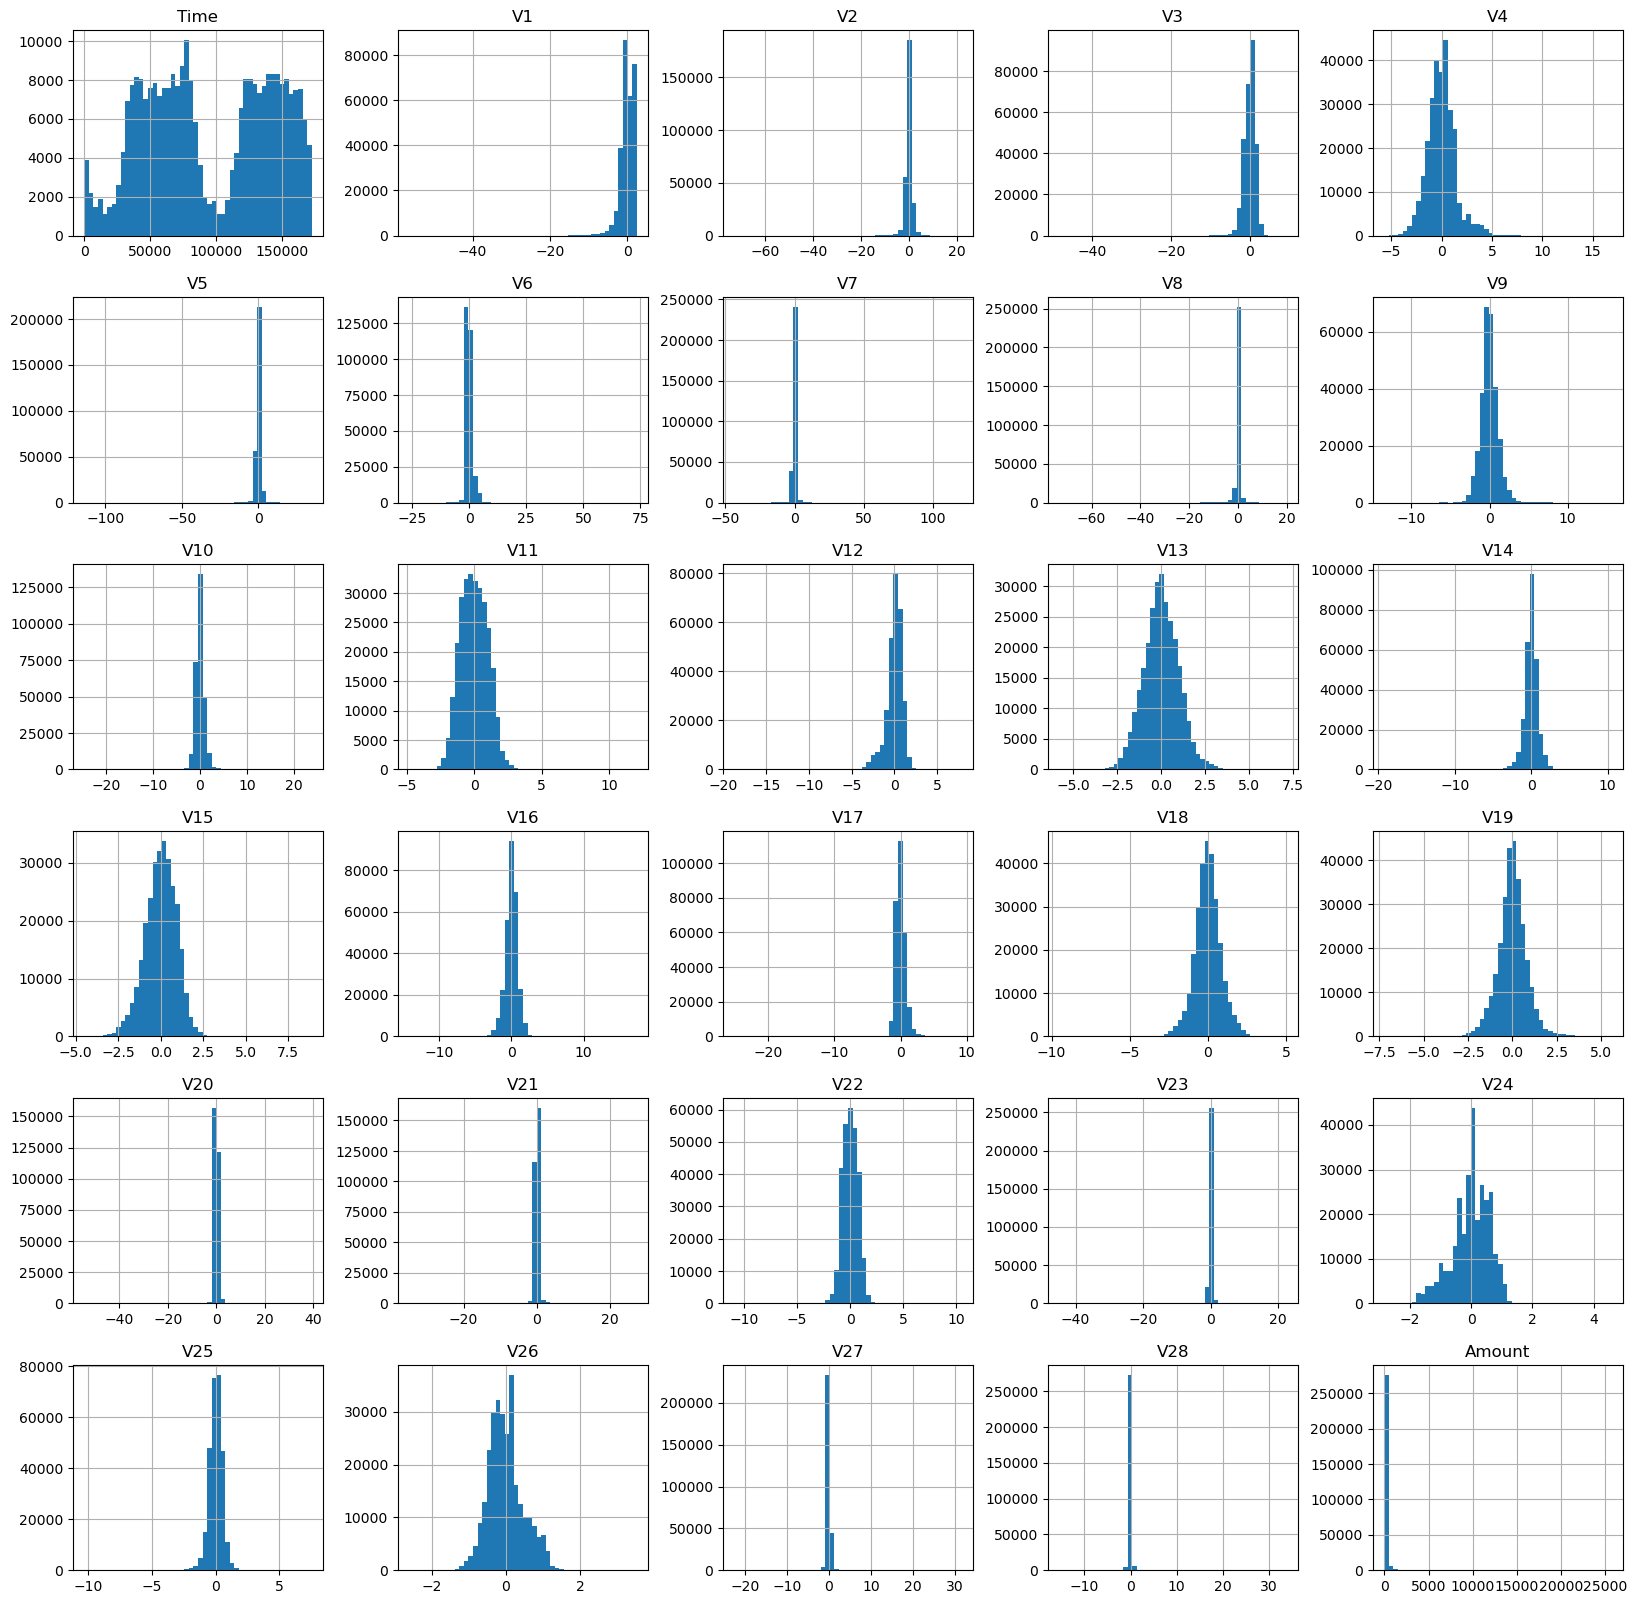

In [15]:
# Plot distribution of features
df.drop('Class', axis=1).hist(figsize=(20,20), bins=50)
plt.show()

# Correlation matrix
corr_matrix = df.corr()

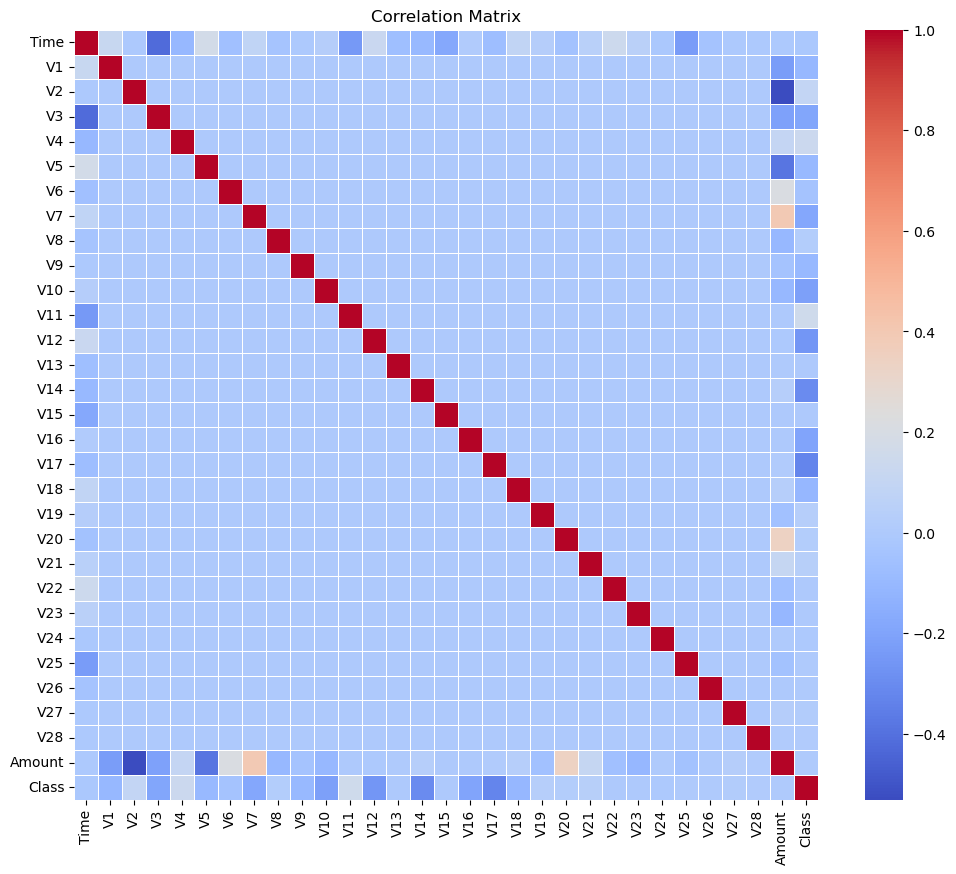

In [16]:

# Plot correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Check correlation with the target variable
print(corr_matrix['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [18]:
# Separating the features and the target
X = df.drop(columns=['Class'])
y = df['Class']

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

NameError: name 'StandardScaler' is not defined